# Análisis Exploratorio
**Nombres:** Jose Villalta - Daniel Collaguazo

**Fecha:** 4 de octubre del 2024

**Actividad-tema:** Análisis exploratorio de imágenes sobre tumores de osteosarcoma


In [1]:
import os
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import seaborn as sns


## Introducción
En este dataset contiene la clasificación de imágenes histológicas para identificar la viabilidad de tejidos cancerosos. El objetivo es entrenar un modelo de aprendizaje automático que clasifique imágenes en tres categorías principales: **no tumor**, **tumor no viable**, y **tumor viable**. El análisis se realiza mediante características de color y textura extraídas de las imágenes.

## Carga de los Datos
Se realiza una inspección inicial de las variables disponibles, incluyendo el número de imágenes y las diferentes clases de clasificación de tejidos presentes en el dataset.

Nombre: Osteosarcoma-Tumor-Assessment

Propietario: TCIA - UT Southwestern/UT Dallas

N° de Variables: 3

Numero de observaciones: 1357

Variable de salida: no tumor (0), viable, (1)tumor no viable (2), y tumor viable (3).

link: https://www.cancerimagingarchive.net/collection/osteosarcoma-tumor-assessment/

In [2]:
print("Training-Set-1")
base_dir = './Osteosarcoma/Training-Set-2'
for folder in os.listdir('./Osteosarcoma/Training-Set-1'):
    folder_path = os.path.join('./Osteosarcoma/Training-Set-1', folder)
    num_images = len(os.listdir(folder_path))
    print(f'Categoría: {folder}, Número de imágenes: {num_images}')


print("Training-Set-2")

for folder in os.listdir('./Osteosarcoma/Training-Set-2'):
    folder_path = os.path.join('./Osteosarcoma/Training-Set-2', folder)
    num_images = len(os.listdir(folder_path))
    print(f'Categoría: {folder}, Número de imágenes: {num_images}')


Training-Set-1
Categoría: set5, Número de imágenes: 51
Categoría: set3, Número de imágenes: 51
Categoría: set9, Número de imágenes: 51
Categoría: set2, Número de imágenes: 51
Categoría: set10, Número de imágenes: 60
Categoría: set8, Número de imágenes: 51
Categoría: set1, Número de imágenes: 27
Categoría: set11, Número de imágenes: 49
Categoría: set6, Número de imágenes: 51
Categoría: set7, Número de imágenes: 51
Categoría: set4, Número de imágenes: 51
Training-Set-2
Categoría: set5, Número de imágenes: 51
Categoría: set3, Número de imágenes: 51
Categoría: set9, Número de imágenes: 51
Categoría: set2, Número de imágenes: 51
Categoría: set10, Número de imágenes: 51
Categoría: set8, Número de imágenes: 51
Categoría: set1, Número de imágenes: 51
Categoría: set11, Número de imágenes: 51
Categoría: set6, Número de imágenes: 51
Categoría: set7, Número de imágenes: 51
Categoría: set4, Número de imágenes: 51
Categoría: set12, Número de imágenes: 49


## Carga de datos clasificados

En esta parte se identificó los diferentes archivos con la clasificación para cada imagen y se les unió en uno solo para su mejor manejo

In [8]:
def cargar_csvs(base_dir):
    dataframes = []
    
    for folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder)
        
        for file in os.listdir(folder_path):
            if file.lower().endswith('.csv'):
                csv_path = os.path.join(folder_path, file)
                
                nombresVariables=['ruta','clasificacion']

                df = pd.read_csv(csv_path, sep = ',', names=nombresVariables)
                
                df['carpeta'] = folder
                
                dataframes.append(df)
    
    df_combined = pd.concat(dataframes, ignore_index=True)
    
    return df_combined


base_dir = './Osteosarcoma/Training-Set-2'
df = cargar_csvs(base_dir)

df.head()

ruta     clasificacion carpeta
0  Case 4 C29-22504-33746.jpg  Non-Viable-Tumor    set5
1  Case 4 C34-17486-25030.jpg  Non-Viable-Tumor    set5
2  Case 4 C28-27602-26398.jpg  Non-Viable-Tumor    set5
3  Case 4 C29-16874-21863.jpg  Non-Viable-Tumor    set5
4  Case 4 C29-22107-10482.jpg            Viable    set5

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ruta           709 non-null    object
 1   clasificacion  709 non-null    object
 2   carpeta        709 non-null    object
dtypes: object(3)
memory usage: 16.7+ KB


In [10]:
base_dir2 = './Osteosarcoma/Training-Set-1'
df2 = cargar_csvs(base_dir2)

df2

ruta     clasificacion carpeta
0    Case 4 C34-44491-21355.jpg         Non-Tumor    set5
1    Case 4 C31-25781-32079.jpg  Non-Viable-Tumor    set5
2    Case 4 C28-42525-25070.jpg  Non-Viable-Tumor    set5
3    Case 4 C34-42840-21049.jpg         Non-Tumor    set5
4    Case 4 C29-26385-28225.jpg  Non-Viable-Tumor    set5
..                          ...               ...     ...
643  Case 4 C24-37864-31739.jpg  Non-Viable-Tumor    set4
644  Case 4 C28-36370-18227.jpg            Viable    set4
645  Case 4 C21-42043-16377.jpg            Viable    set4
646  Case 4 C27-45200-21938.jpg         Non-Tumor    set4
647  Case 4 C28-35755-28991.jpg  Non-Viable-Tumor    set4

[648 rows x 3 columns]

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ruta           648 non-null    object
 1   clasificacion  648 non-null    object
 2   carpeta        648 non-null    object
dtypes: object(3)
memory usage: 15.3+ KB


In [12]:
dataset_unido = pd.concat([df, df2]).reset_index(drop=True)
dataset_unido

ruta     clasificacion carpeta
0     Case 4 C29-22504-33746.jpg  Non-Viable-Tumor    set5
1     Case 4 C34-17486-25030.jpg  Non-Viable-Tumor    set5
2     Case 4 C28-27602-26398.jpg  Non-Viable-Tumor    set5
3     Case 4 C29-16874-21863.jpg  Non-Viable-Tumor    set5
4     Case 4 C29-22107-10482.jpg            Viable    set5
...                          ...               ...     ...
1352  Case 4 C24-37864-31739.jpg  Non-Viable-Tumor    set4
1353  Case 4 C28-36370-18227.jpg            Viable    set4
1354  Case 4 C21-42043-16377.jpg            Viable    set4
1355  Case 4 C27-45200-21938.jpg         Non-Tumor    set4
1356  Case 4 C28-35755-28991.jpg  Non-Viable-Tumor    set4

[1357 rows x 3 columns]

In [13]:
dataset_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ruta           1357 non-null   object
 1   clasificacion  1357 non-null   object
 2   carpeta        1357 non-null   object
dtypes: object(3)
memory usage: 31.9+ KB


## Análisis grafico
Ahora se realizó un análisis grafico sobre la variable de clasificación que es la variable mas importante dentro de nuestro estudio y también de cómo están distribuidas nuestras imágenes en cada una de las carpetas, así como la cantidad de imágenes en cada una.


<Axes: xlabel='clasificacion', ylabel='count'>

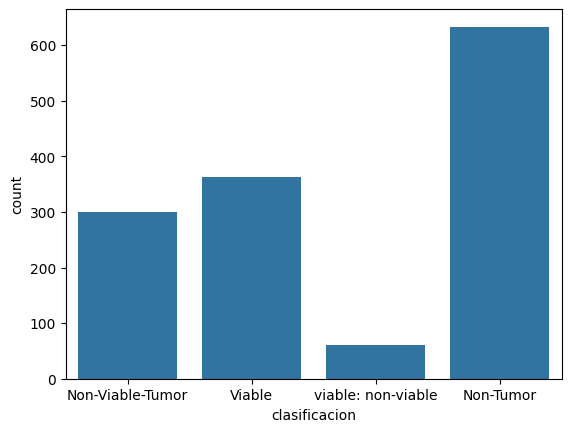

In [14]:
Y=dataset_unido['clasificacion']
sns.countplot(x=Y)

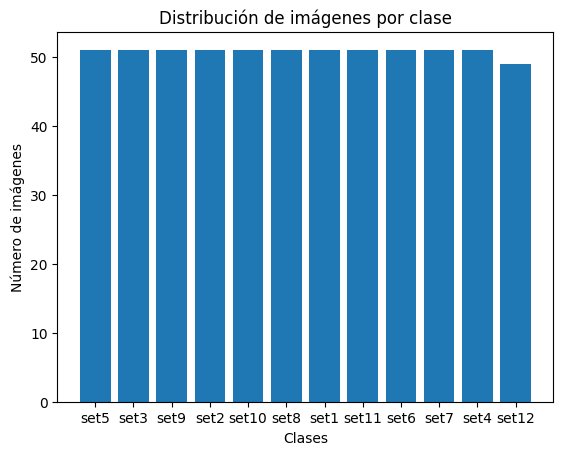

In [15]:
clases = {}
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    num_images = len(os.listdir(folder_path))
    clases[folder] = num_images

# Visualización de la distribución de las clases
plt.bar(clases.keys(), clases.values())
plt.title('Distribución de imágenes por clase')
plt.xlabel('Clases')
plt.ylabel('Número de imágenes')
plt.show()

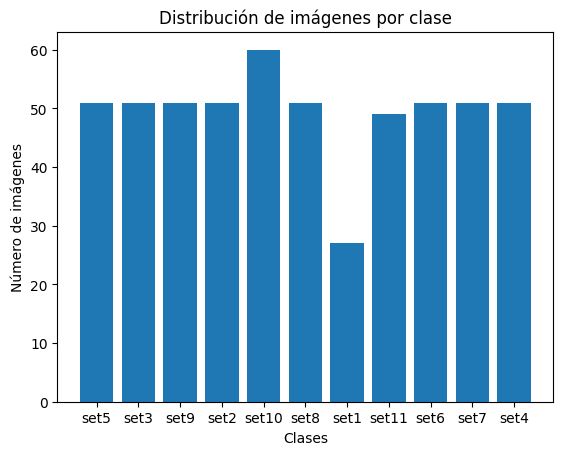

In [16]:
clases = {}
for folder in os.listdir(base_dir2):
    folder_path = os.path.join(base_dir2, folder)
    num_images = len(os.listdir(folder_path))
    clases[folder] = num_images

# Visualización de la distribución de las clases
plt.bar(clases.keys(), clases.values())
plt.title('Distribución de imágenes por clase')
plt.xlabel('Clases')
plt.ylabel('Número de imágenes')
plt.show()

## Inspección de Formato y Dimensiones
Ahora inspeccionamos el tamaño de las imágenes y le cambiamos las dimensiones para tener un mejor manejo de ellas, además de corroborar la cantidad de canales de ellas.


In [17]:
image_shapes = []
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    
    for img_file in os.listdir(folder_path):
        if img_file.lower().endswith('.jpg'):
            img_path = os.path.join(folder_path, img_file)
            with Image.open(img_path) as img:
                image_shapes.append(img.size)

shape_counts = Counter(image_shapes)
print('Distribución de tamaños de imagen:', shape_counts)

Distribución de tamaños de imagen: Counter({(1024, 1024): 597})


## Extracción de un pequeño conjunto de imágenes
Extraemos algunas imágenes de cada grupo, esto con el fin de tener una idea de que imágenes y como están representadas.


In [20]:

def mostrar_imagenes(base_dir, num_imagenes=5):
    for folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder)
        # Filtrar solo archivos .jpg
        imgs_jpg = [img for img in os.listdir(folder_path) if img.lower().endswith('.jpg')]
        
        if len(imgs_jpg) >= num_imagenes:
            imgs = random.sample(imgs_jpg, num_imagenes)
        else:
            imgs = imgs_jpg
        
        fig, axes = plt.subplots(1, len(imgs), figsize=(15, 5))
        
        for i, img_file in enumerate(imgs):
            img_path = os.path.join(folder_path, img_file)
            img = Image.open(img_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(folder)
        
        plt.show()

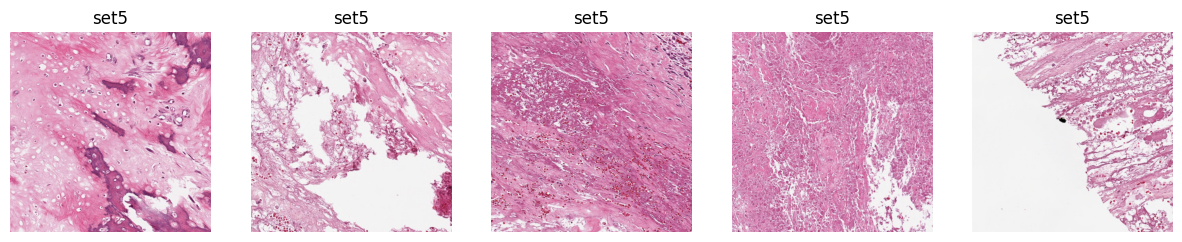

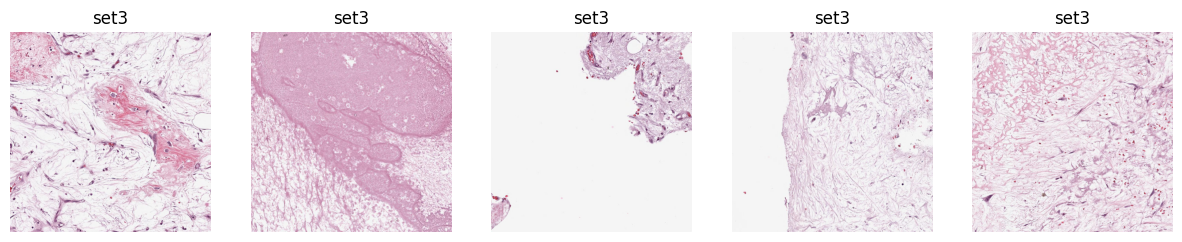

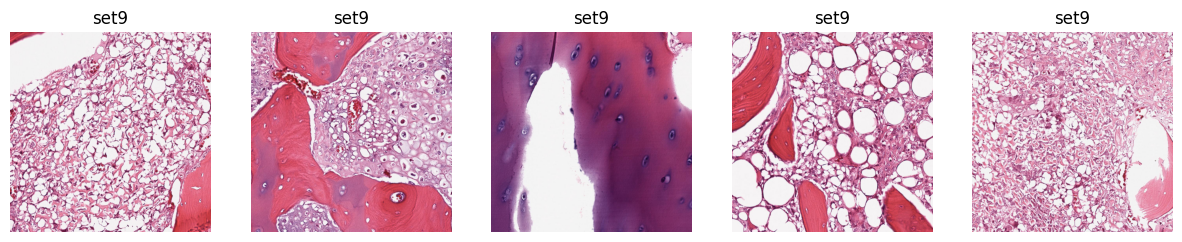

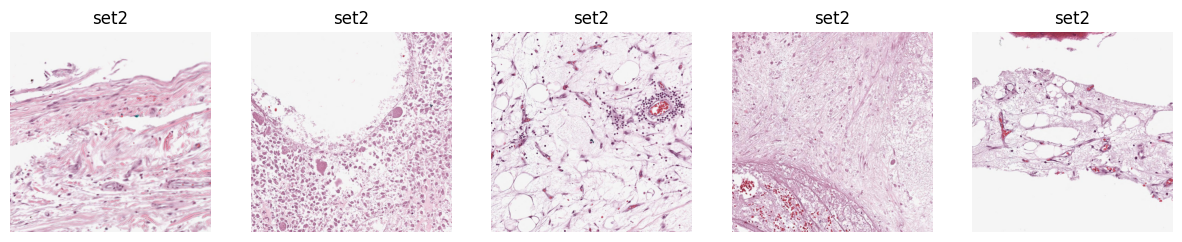

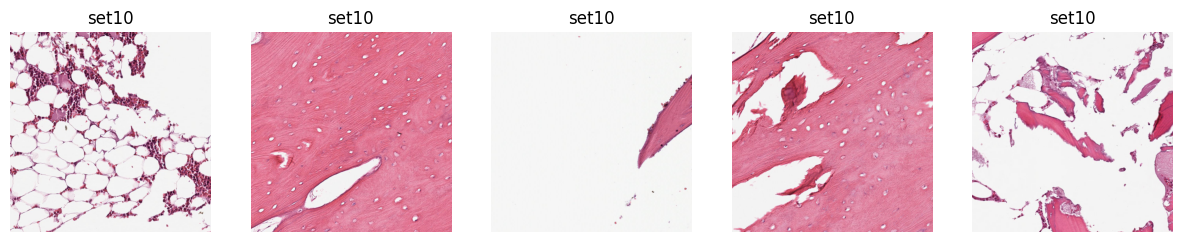

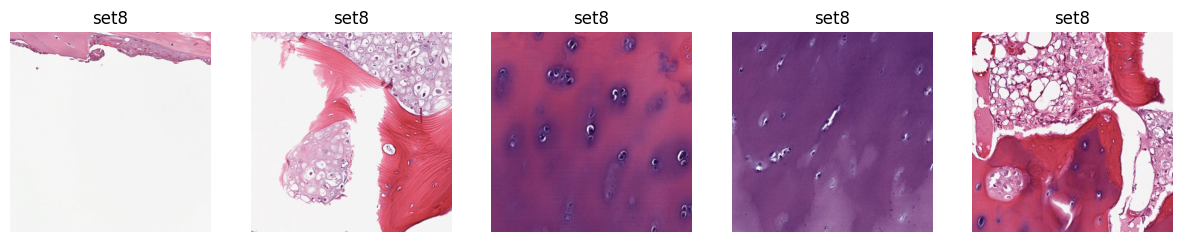

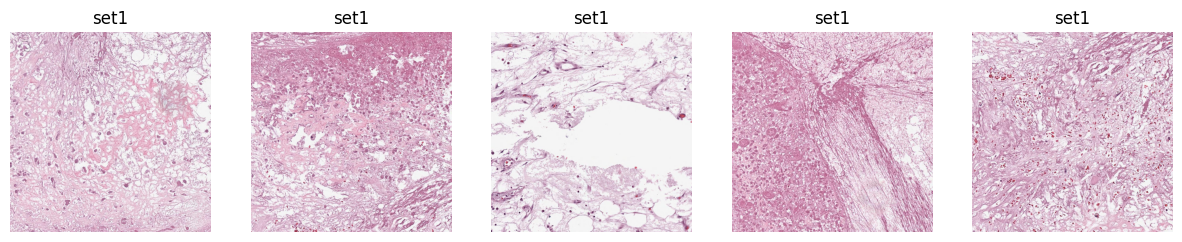

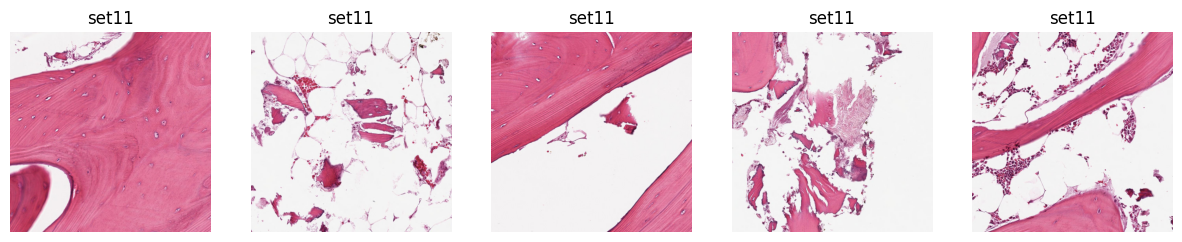

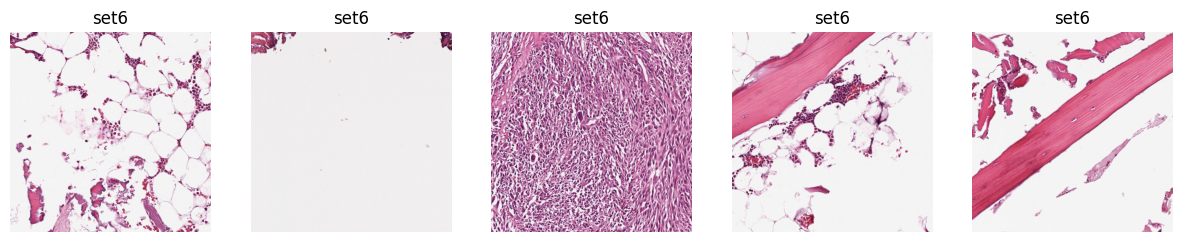

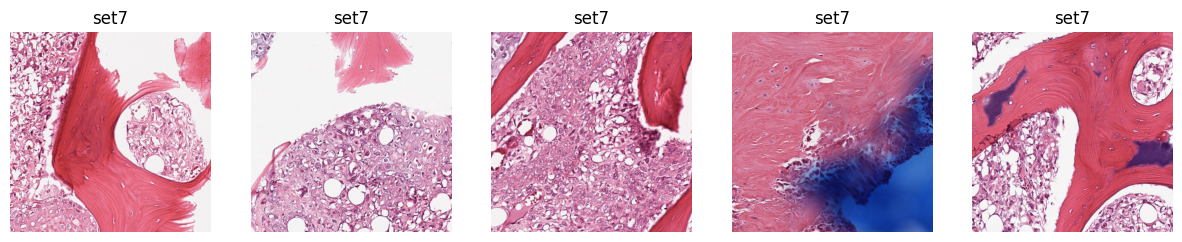

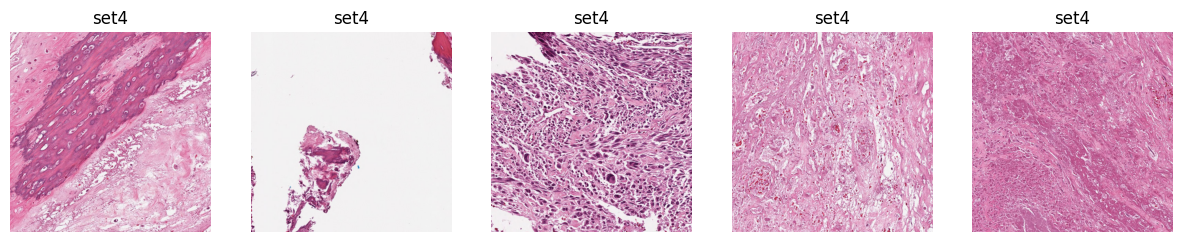

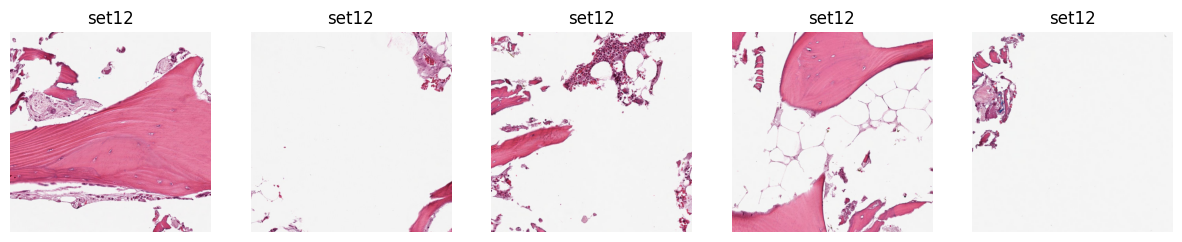

In [21]:
mostrar_imagenes(base_dir)

## Estadísticas descriptivas
Hacemos un pequeño análisis descriptivo para observar la frecuencia de pixeles de las imágenes y verificar si es necesario normalizarlos


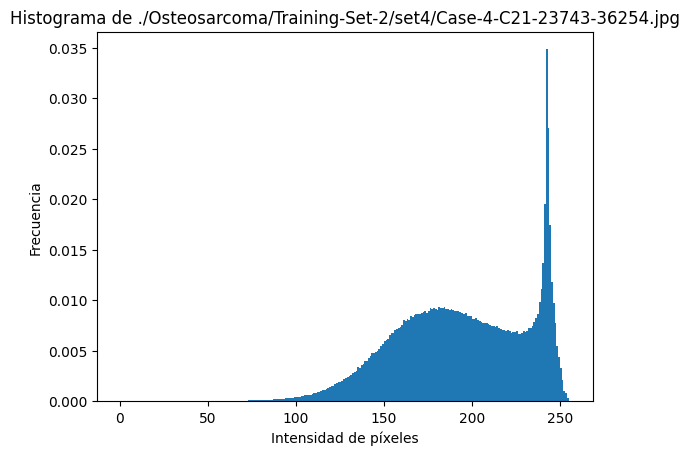

In [22]:
def mostrar_histograma_imagen(img_path):
    img = Image.open(img_path).convert('L')
    img_array = np.array(img)
    plt.hist(img_array.ravel(), bins=256, range=(0, 256), density=True)
    plt.title(f'Histograma de {img_path}')
    plt.xlabel('Intensidad de píxeles')
    plt.ylabel('Frecuencia')
    plt.show()

img_path = './Osteosarcoma/Training-Set-2/set4/Case-4-C21-23743-36254.jpg'
mostrar_histograma_imagen(img_path)


## Transformaciones preliminares
Hacemos un par de transformaciones preliminares, así como convertirlas a una escala de grises o alterar su dimensionalidad


In [23]:
def identificar_dimensiones(base_dir):
    dimensiones = []
    
    for folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder)
        
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith('.jpg'):
                img_path = os.path.join(folder_path, img_file)
                
                with Image.open(img_path) as img:
                    img_array = np.array(img)
                    dimensiones.append(img_array.shape)
                    
    return dimensiones
    
dimensiones = identificar_dimensiones(base_dir)
print(f'Dimensionalidades de las imágenes: {set(dimensiones)}')


Dimensionalidades de las imágenes: {(1024, 1024, 3)}


In [24]:
def transformar_imagen(img_path, nuevo_tamano=(128, 128), escala_grises=False):
    with Image.open(img_path) as img:
        if escala_grises:
            img = img.convert('L')  # Convertir a escala de grises
        img = img.resize(nuevo_tamano)
        
        # Mostrar la imagen transformada en el mismo archivo
        plt.imshow(img, cmap='gray' if escala_grises else None)
        plt.axis('off')  # Ocultar los ejes
        plt.show()

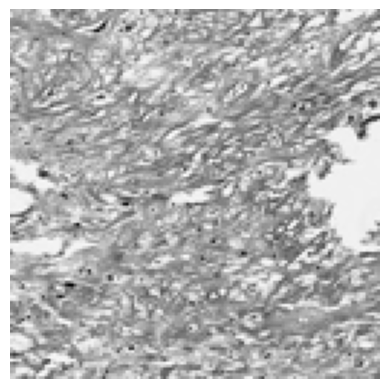

In [25]:
# Imagen a escala de grises
transformar_imagen('./Osteosarcoma/Training-Set-2/set4/Case-4-C21-23743-36254.jpg', nuevo_tamano=(128, 128), escala_grises=True)


In [26]:
def convertir_a_rgb(img_path, nuevo_tamano=(128, 128)):
    with Image.open(img_path) as img:
        if img.mode != 'RGB':
            img = img.convert('RGB')  # Convertir a RGB si no lo es
        img = img.resize(nuevo_tamano)
        
        # Mostrar la imagen en RGB y con el tamaño adecuado
        plt.imshow(img)
        plt.axis('off')  # Ocultar los ejes
        plt.show()


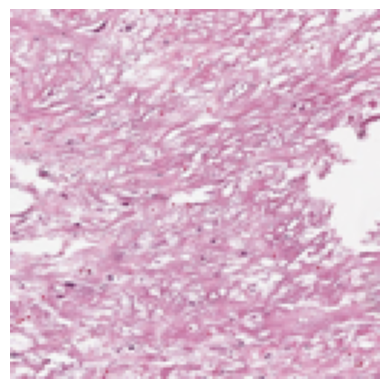

In [27]:
#Convertir una imagen a RGB y cambiar el tamaño
convertir_a_rgb('./Osteosarcoma/Training-Set-2/set4/Case-4-C21-23743-36254.jpg', nuevo_tamano=(128, 128))

## Conclusiones
En base al análisis exploratorio, se observa lo siguiente:

1. Diversidad de Clases: El dataset contiene imágenes clasificadas en cuatro categorías importantes para evaluar la viabilidad de tejidos tumorales. Esta clasificación facilita el desarrollo de modelos que puedan aprender diferencias clave en las características visuales.
2. Características de Color y Textura: La extracción de estas características es relevante para distinguir entre tumores viables y no viables, así como tejido no tumoral, destacando la importancia de un análisis exhaustivo de las propiedades visuales de las imágenes.
3. Tamaño del Dataset: La cantidad de imágenes y pacientes es adecuada para entrenar modelos de aprendizaje automático.
4. Formato de las imagenes: Las imagenes cuentan con un formato de dimensiones y capas correctos para su analsis.
5. La clasificación de las imágenes permiten tener un mejor estudio y mayor organización de ellas, aunque estén separadas en conjuntos con un nombre no relacionado, la etiqueta de cada una permite clasificarlas.

## Referencias

**[1] Goodfellow, I., Bengio, Y., & Courville, A.** (2016). *Deep Learning*. MIT Press.
   [http://alvarestech.com/temp/deep/Deep%20Learning%20by%20Ian%20Goodfellow,%20Yoshua%20Bengio,%20Aaron%20Courville%20(z-lib.org).pdf](http://alvarestech.com/temp/deep/Deep%20Learning%20by%20Ian%20Goodfellow,%20Yoshua%20Bengio,%20Aaron%20Courville%20(z-lib.org).pdf)

**[2] Gonzalez, R. C., & Woods, R. E.** (2002). *Digital Image Processing* (3rd Edition). Prentice Hall. [https://dl.icdst.org/pdfs/files4/01c56e081202b62bd7d3b4f8545775fb.pdf](https://dl.icdst.org/pdfs/files4/01c56e081202b62bd7d3b4f8545775fb.pdf)

**[3] The Cancer Imaging Archive (TCIA)**. *Osteosarcoma Tumor Assessment Collection*.  
   [https://www.cancerimagingarchive.net/collection/osteosarcoma-tumor-assessment/](https://www.cancerimagingarchive.net/collection/osteosarcoma-tumor-assessment/)  
   
**[4] Brownlee, J.** (2019). *How to Develop a Convolutional Neural Network to Classify Photos of Dogs and Cats*. Machine Learning Mastery.  
   [https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/) 
